In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

sns.set_theme(style="whitegrid")
np.random.seed(42)

### 🔍 **Resumen de análisis según tipo de variables**

| Tipo de Relación         | Gráficos sugeridos       | Pruebas estadísticas           |
|--------------------------|---------------------------|----------------------------------|
| **Continua - Continua**  | `scatterplot`             | Correlación de Pearson / Spearman |
| **Categórica - Categórica** | `countplot`, `heatmap`  | Chi-cuadrado / Cramér’s V        |
| **Categórica - Continua**| `boxplot`, `violinplot`   | ANOVA / t-test / Welch test      |



### **Prueba Chi-cuadrado**

In [2]:
# Datos de preferencia de bebida por género
tips = sns.load_dataset('tips')

display(tips)

# Crear tabla de contingencia
contingency_table = pd.crosstab(tips['sex'], tips['smoker'])
display(contingency_table)

# Prueba Chi-cuadrado
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados
print('🔍 Chi-squared Test: Sex vs Smoker')
print(f'Chi2 statistic = {chi2:.2f}')
print(f'p-value = {p_chi:.4f}')

if p_chi < 0.05:
    print('✅ Hay una relación significativa entre el sexo y el hábito de fumar.\n')
else:
    print('❌ No se encontró relación significativa entre el sexo y el hábito de fumar.\n')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


🔍 Chi-squared Test: Sex vs Smoker
Chi2 statistic = 0.00
p-value = 1.0000
❌ No se encontró relación significativa entre el sexo y el hábito de fumar.



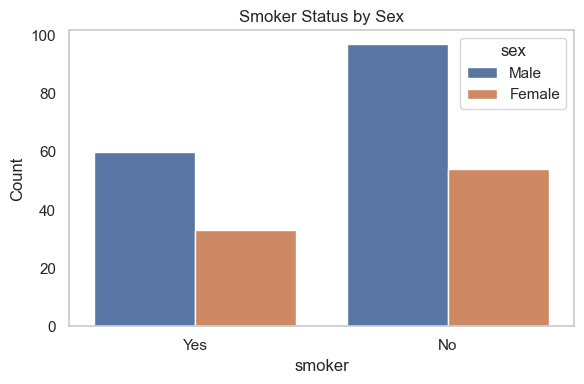

In [3]:
# Gráfico de conteo
plt.figure(figsize=(6, 4))
sns.countplot(data=tips, x='smoker', hue='sex')
plt.title('Smoker Status by Sex')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()


🔍 Chi-squared Test: Smoker vs Time
Chi2 statistic = 0.51
p-value = 0.4771
❌ No se encontró relación significativa entre fumar y la hora del día.



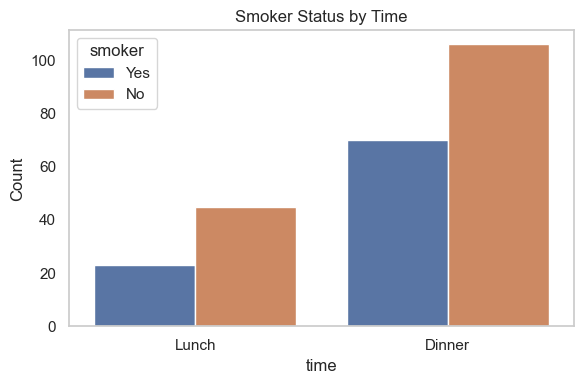

In [4]:
contingency_table = pd.crosstab(tips['smoker'], tips['time'])

# Aplicar la prueba chi-cuadrado
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

# Resultados Chi-cuadrado
print('\n🔍 Chi-squared Test: Smoker vs Time')
print(f'Chi2 statistic = {chi2:.2f}')
print(f'p-value = {p_chi:.4f}')

# Interpretación automática
if p_chi < 0.05:
    print('✅ Hay una relación significativa entre fumar y la hora del día.\n')
else:
    print('❌ No se encontró relación significativa entre fumar y la hora del día.\n')

# Gráfico: Distribución de fumar por hora del día (sin líneas de cuadrícula)
plt.figure(figsize=(6, 4))
sns.countplot(data=tips, x='time', hue='smoker')
plt.title('Smoker Status by Time')
plt.ylabel('Count')
plt.grid(False)  # Quitar líneas de cuadrícula
plt.tight_layout()
plt.show()

🔍 Chi-squared Test: Smoker vs Day
Chi2 statistic = 25.79
p-value = 0.0000
✅ Hay una relación significativa entre fumar y el día de la semana.


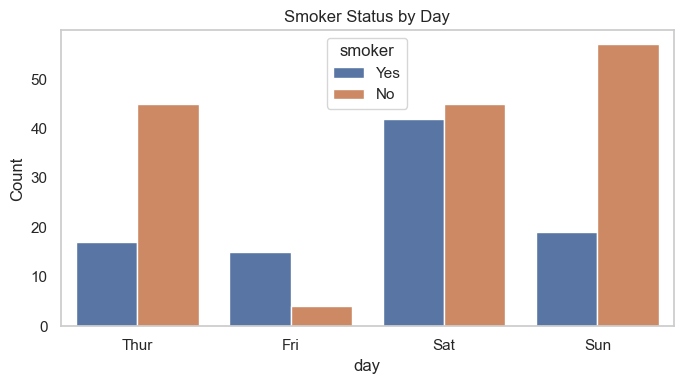

In [5]:
contingency_table = pd.crosstab(tips['smoker'], tips['day'])

# Aplicar prueba chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados
print('🔍 Chi-squared Test: Smoker vs Day')
print(f'Chi2 statistic = {chi2:.2f}')
print(f'p-value = {p_value:.4f}')

# Interpretación automática
if p_value < 0.05:
    print('✅ Hay una relación significativa entre fumar y el día de la semana.')
else:
    print('❌ No se encontró una relación significativa entre fumar y el día de la semana.')

# Gráfico de barras (sin líneas de cuadrícula)
plt.figure(figsize=(7, 4))
sns.countplot(data=tips, x='day', hue='smoker')
plt.title('Smoker Status by Day')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()

In [6]:
contingency_table

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


Algunos patrones notables:

- Viernes tiene muy pocos no fumadores.
- Jueves y Domingo tiene muchos no fumadores y relativamente pocos fumadores.
- Sábado tiene alta asistencia tanto de fumadores como no fumadores.

**🎯 ACCIONES RECOMENDADAS**
1. **Segmentación de promociones o servicios**
- **Viernes:** Hay una proporción muy alta de fumadores →
    - Podrías lanzar promociones que atraigan fumadores (menú especial, zona al aire libre, etc.)
    - También, si tienes políticas de restricción, reforzar medidas ese día (vigilancia, señalización).

- **Domingo:** Mayoría son no fumadores →
    - Ideal para promocionar como un día familiar o saludable (brunch, ambiente libre de humo).
    - Podrías ajustar el ambiente, música, o incluso el personal.

2. **Ajuste de personal y experiencia del cliente**

Si tienes datos de comportamiento de compra, podrías:

- Entrenar a tu personal en cómo abordar clientes fumadores vs no fumadores.
- Cambiar el layout del local o distribuir mesas según los patrones de público por día.

3. **Comunicación y marketing**

Segmentar mensajes de campañas por día:

- “Viernes con amigos y buena vibra 🥂” → si está dirigido a fumadores.
- “Domingos en familia, aire fresco y buena comida 🌿” → si se enfoca en no fumadores.